# Data Analysis

In [2]:
# libraries
import pandas as pd
from paths_ import Path
import numpy as np

import matplotlib.pyplot as plt

## Read dataset

In [3]:
df_read = pd.read_excel('twitter_clean_data.xlsx')
df = df_read.copy(deep=True)

In [4]:
df.shape

(1726, 34)

1. How many users participated?
    - Who was the user with more relevance on retweets?
    - Who was the user with more relevance on favorites?
2. Is there some relationship between "retweets" and "favorites" measures?
3. What is the period of time?
4. How many tweets were created by day? Calculate max, min, average
5. How many tweets are retweets?
6. How many tweets by country are?
7. What is the distribution by language?
8. What is the distribution by user 👨🏻‍💻 or bot 🤖?
9. What is the distribution by sentiment?

* ¿Que indicador me permitirá visualizar su crecimiento y relevancia en el futuro?
* ¿Que indicador me permitirá detectar los tweets, temas y usuarios mas relevantes en el futuro?



## 1. How many users participated?

In [93]:
len(df['name'].unique())

1516

1516 users

### Data normalization

In [12]:
retween_min = df['retweet_count'].min()
retween_max = df['retweet_count'].max()
df['score_retweet'] = (df['retweet_count'] - retween_min) / (retween_max - retween_min) 

In [13]:
favorite_min = df['favorite_count'].min()
favorite_max = df['favorite_count'].max()
df['score_favorite'] = (df['favorite_count'] - favorite_min) / (favorite_max - favorite_min)

### Who was the user with more relevance  on retweets?

In [107]:
df[df['score_retweet'] == df['score_retweet'].max()]

,Unnamed: 0,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,...,City,country,user_or_bot,sentiment,year,month_num,month,score_retweet,score_favorite,row
712,712,1370000000000000000,1430000000000000000,2021-08-23,carmen_borbaran,La Clínica Las Condes demandando a su ex direc...,Twitter for iPhone,0,0,True,...,Gävle,Sweden,User,Positive,2021,8,August,1.0,0.0,1


* The user who was more relevance on retweets is Carmen borbaran

### Who was the user with more relevance  on favorites?

In [16]:
df[df['score_favorite'] == df['score_favorite'].max()]

,Unnamed: 0,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,...,lon,City,country,user_or_bot,sentiment,year,month_num,month,score_retweet,score_favorite
1718,1718,1534763390,1420000000000000000,2021-08-28,bouliboulibouli,Si le taux de croissance actuel des doses obli...,Twitter Web App,0,0,False,...,30.4167,Pietermaritzburg,South Africa,User,Neutral,2021,8,August,0.021505,1.0


* The user who was more relevance on favorite is Bouli 

### Frequency and Distribution

In [87]:
#histogram
class Histo:
    def __init__(self,dataframe,data,name:str):
        self.dataframe = dataframe
        self.data = data
        self.name = name
        
    def chartHisto(self):
        fig, axes = plt.subplots(2,1, figsize=(15,10))
        plt.style.use('bmh')

        axes[0].hist(self.dataframe[self.data],bins=50)
        axes[0].set_title('Histogram')
        # axes[0].set_xlabel('Total $')
        axes[0].set_ylabel('Frequency')

        axes[1].boxplot(self.dataframe[self.data],vert=False, whis=2,patch_artist=True)
        axes[1].set_title('Distribution - Outliers o')
        axes[1].set_xlabel(self.name)

        plt.show()

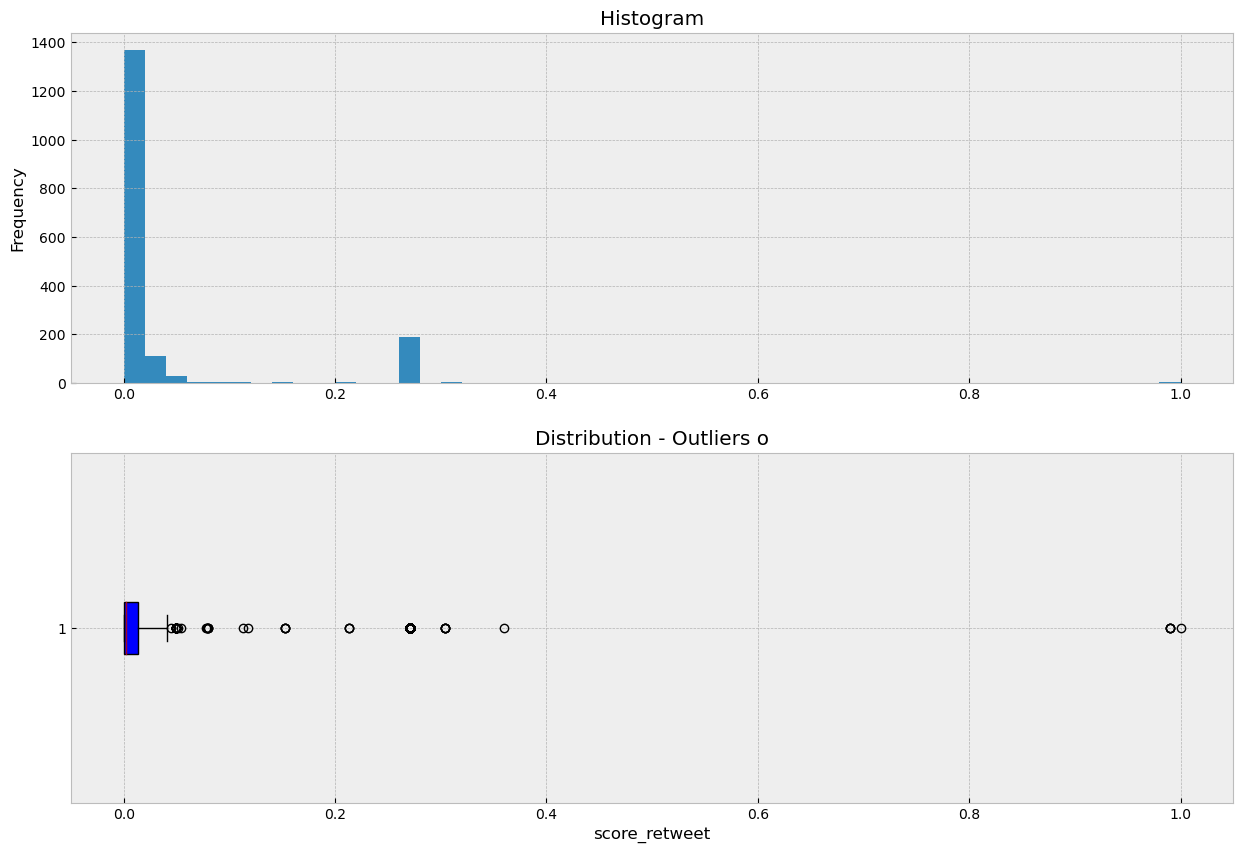

In [88]:
retweet_hist = Histo(df,'score_retweet','score_retweet').chartHisto()

* The most of data, near to 1400 records their values fall on 0.07
* There is a set of data, near to 200 records that values fall on 0.25

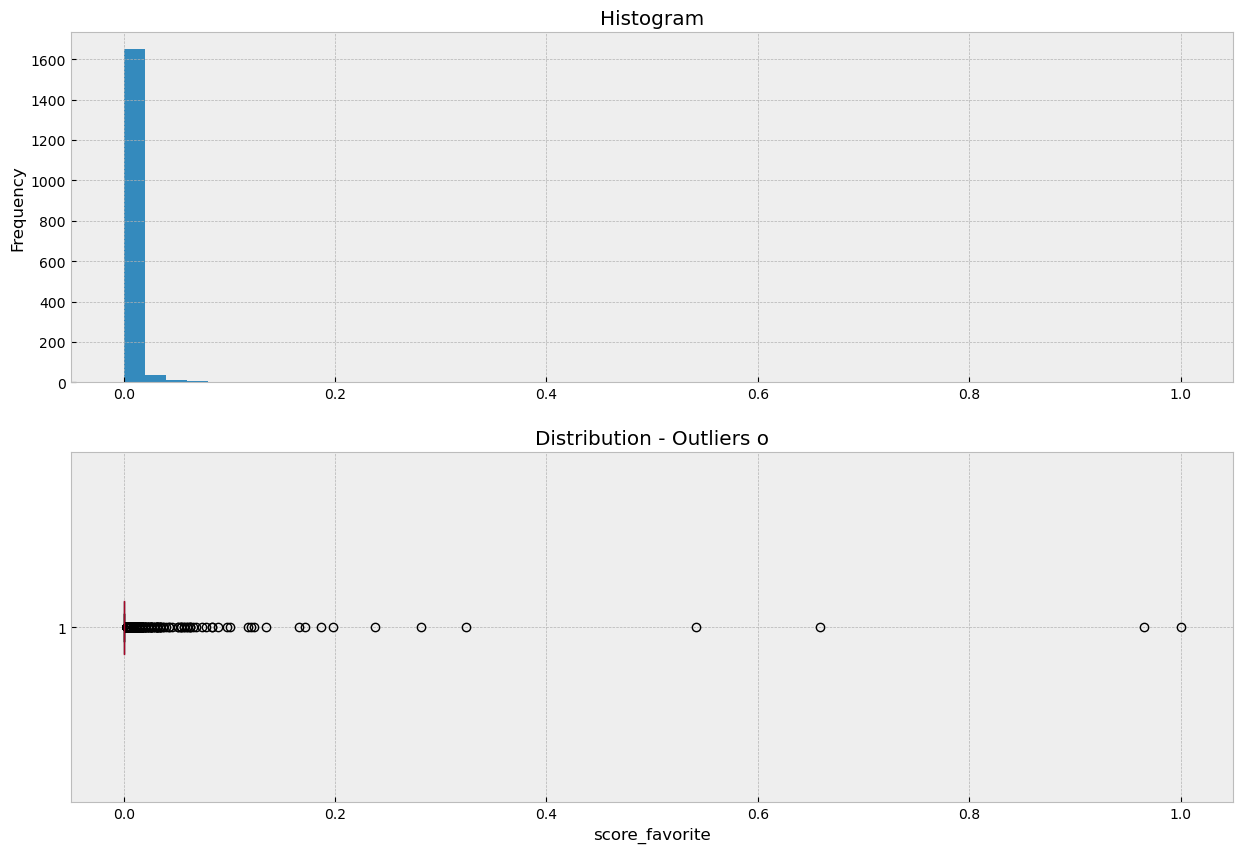

In [89]:
favorite_hist = Histo(df,'score_favorite','score_favorite').chartHisto()

* The most of data falls on an interval of values 0 - 0.03

## 2. Is there some relationship between "retweets" and "favorites" measures?

In [90]:
class ScatterPlot:
    def __init__(self,dataframe,x_param,y_param,x_name:str,y_name:str):
        self.dataframe = dataframe
        self.x_param = x_param
        self.y_param = y_param
        self.x_name = x_name
        self.y_name = y_name
        
    def scatterChart(self):
        plt.scatter(self.dataframe[self.x_param],self.dataframe[self.y_param])
        plt.xlabel(self.x_name)
        plt.ylabel(self.y_name)
        plt.show()

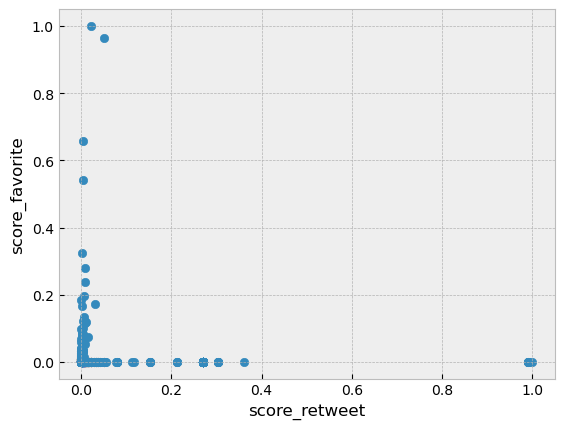

In [91]:
ret_fav = ScatterPlot(df,'score_retweet','score_favorite','score_retweet','score_favorite').scatterChart()

There is no relationship between score_retweet and score_favorite.

* The most distribution of points are near to zero in both measures.

## 3. What is the period of time?

In [5]:
df['created_at'].min()

Timestamp('2021-08-01 00:00:00')

In [6]:
df['created_at'].max()

Timestamp('2021-08-31 00:00:00')

The period of time is between August 1, 2021 y August, 31 2021

## 4. How many tweets were created by day? Calculate max, min, average

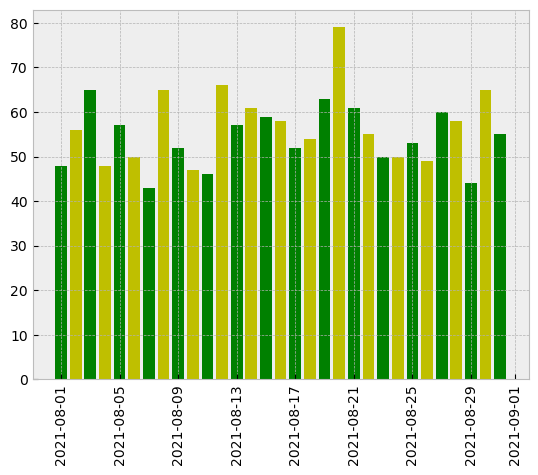

In [105]:
# tweets creados por dia
tw_time = pd.DataFrame(df.groupby('created_at',as_index=False)['sentiment_value'].count())

# grafica
plt.bar(tw_time['created_at'],tw_time['sentiment_value'],color=['g','y'])
plt.xticks(rotation=90)
plt.show()

In [8]:
tw_time.describe()

,sentiment_value
count,31.000000
mean,55.677419
std,7.807633
min,43.000000
25%,50.000000
50%,55.000000
75%,60.500000
max,79.000000


In [9]:
tw_time[tw_time['sentiment_value'] == 79]

,created_at,sentiment_value
19,2021-08-20,79


* Time period of time is from August 1, 2021 to August, 31 2021. Tweets of 31 days
* There were created 55 tweets in average by day
* 79 tweets were created at 2021-08-20. This is the maximum by day
* 43 tweets were created at 2021-08-07. This is the minimum by day

## 5. How many tweets are retweets?

In [28]:
df['is_retweet'].unique()

array([False,  True])

In [31]:
is_retweet = pd.DataFrame(df.groupby('is_retweet',as_index=False)['text'].count())

In [32]:
is_retweet

,is_retweet,text
0,False,653
1,True,1073


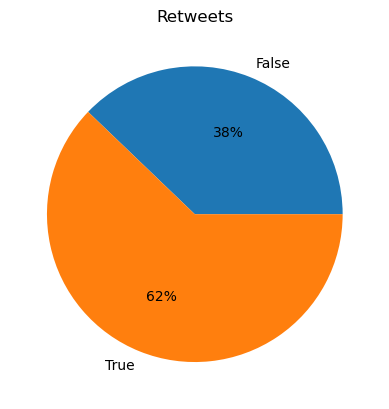

In [38]:
plt.pie(is_retweet['text'],labels=is_retweet['is_retweet'], autopct='%0.0f%%')
plt.title('Retweets')
plt.show()

* From the total 1726 tweets, 1073 of them are retweets (62%)

* 653 are not retweets (38%)

## 6. How many tweets by country are?

In [43]:
by_country = pd.DataFrame(df.groupby('country',as_index=False)['text'].count())

In [46]:
len(by_country['country'])

41

In [50]:
by_country['%'] = round((by_country['text'] / by_country['text'].sum())*100,2)

In [94]:
# by_country.sort_values('text',ascending=False)

In [64]:
import squarify

In [72]:
# list of colors that will be used on charts
colours = ['#fae7b5', '#deb887', '#bebada', '#fb8072','#80b1d3'
               , '#fdb462', '#b3de69','#e32636','#ffbf00','#9966cc'
              , '#00ffff','#8db600','#e9d66b','#fdee00','#f4c2c2'
              , '#8dd3c7','#ff2052','#bcd4e6','#f5f5dc','#fe6f5e'
              , '#ed872d', '#fff600','#91a3b0','#a3c1ad','#b87333']

In [73]:
class TreeDistribution:
    def __init__(self,dataframe,category:str,percentage:str):
        self.dataframe = dataframe
        self.category = category
        self.percentage = percentage # column of %
        
    
    def distribution(self):
        plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(self.dataframe[self.category], self.dataframe[self.percentage])]
        
        plt.figure(figsize=(10,10))

        squarify.plot(sizes=self.dataframe[self.percentage], label=plot_labels, color=colours, edgecolor='grey')

        # Remove all ticks and labels from x & y axis, but keep border on
        plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        plt.show()

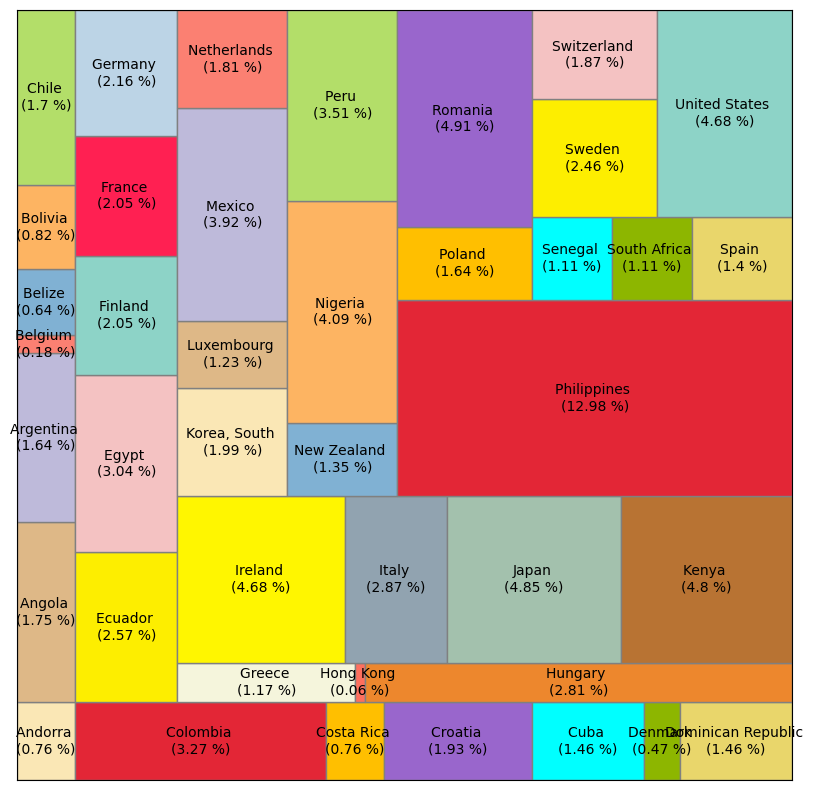

In [74]:
distribution = TreeDistribution(by_country,'country','%').distribution()

## 7. What is the distribution by language?

In [52]:
df['row'] = 1

In [54]:
by_lang = pd.DataFrame(df.groupby('lang',as_index=False)['row'].count())

In [58]:
by_lang = by_lang.sort_values('row',ascending=False)

In [63]:
by_lang

,lang,row
1,en,491
2,es,479
4,it,442
3,fr,312
0,cy,1
5,pt,1


In [97]:
colors_lang = ['#ffbf00','#ff033e','#9966cc','#a4c639','r','b']

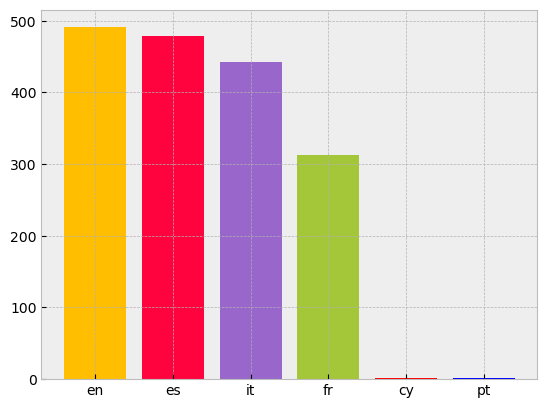

In [98]:
plt.bar(by_lang['lang'],by_lang['row'],color=colors_lang)
plt.show()

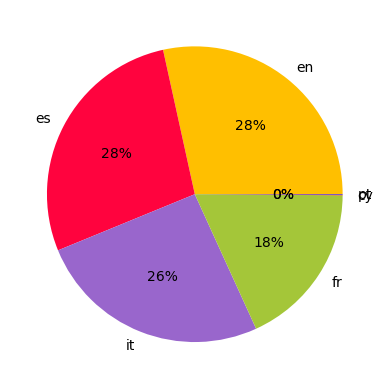

In [100]:
plt.pie(by_lang['row'], labels=by_lang['lang'],autopct='%0.0f%%',colors=colors_lang)
plt.show()

## 8. What is the distribution by user 👨🏻‍💻 or bot 🤖?

In [76]:
by_user_bot = pd.DataFrame(df.groupby('user_or_bot',as_index=False)['row'].count())

In [78]:
by_user_bot['%'] = round((by_user_bot['row'] / by_user_bot['row'].sum()) * 100,2)

In [79]:
by_user_bot

,user_or_bot,row,%
0,Bot,90,5.21
1,User,1636,94.79


## 9. What is the distribution by sentiment?

In [109]:
by_sentiment = pd.DataFrame(df.groupby('sentiment',as_index=False)['row'].count())

In [110]:
by_sentiment['%'] = round((by_sentiment['row'] / by_sentiment['row'].sum()) * 100,2)

In [111]:
by_sentiment

,sentiment,row,%
0,Negative,799,46.29
1,Neutral,183,10.60
2,Positive,744,43.11


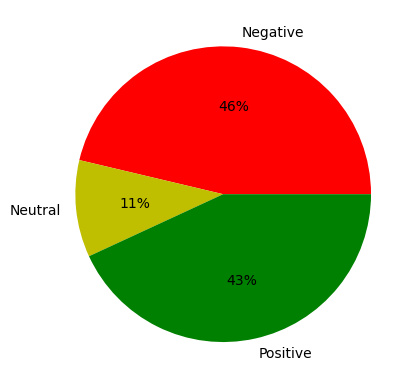

In [115]:
plt.pie(by_sentiment['row'], labels=by_sentiment['sentiment'],autopct='%0.0f%%',colors=['r','y','g'])
plt.show()

## Conclusions
* This data set contians 1726 tweets, created by 1516 users
* 1073 tweets are retweets and they represent the 62% of the total
* 653 are not retweets and they represent the 38% of the total
* Time period of time is from August 1, 2021 to August, 31 2021. Tweets of 31 days
* There were created 55 tweets in average by day
* 79 tweets were created at 2021-08-20. This is the maximum by day
* 43 tweets were created at 2021-08-07. This is the minimum by day
* The most languages used on the tweets are: English(491), Spanish(479), Italian(442) and French(312), and there is one tweet in Portuguese and one tweet in Wales
* The tweets are coming from 41 countries, where Philipines, contributed with 222 tweets and representing the 12% of the total.
* The tweets are comming from two sources, users and bots and 1636 tweets (94.79%), coming from users and 90 tweets (5.21%), coming from bots 
* The distribution by sentiment is: Negative 799(46%), Positive 744(43%), and Neutral 183(10.60%)